<a href="https://colab.research.google.com/github/SelamatRiyandi/2109116064_Posttest2_Datmin/blob/main/2109116064_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [22]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df1 = pd.read_excel('dataset_market_basket.xlsx')
df1

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Menghitung jumlah total data pada tabel tabulasi
totaln = len(df1.index)

# Mengidentifikasi kombinasi setiap 2 item set
kombinasiitemset = set()
for i in range(len(df1.columns)):
      for j in range(len(df1.columns)):

        # Mengambil value setiap data dan dipasangkan untuk menentukan kombinasi itemset
        itemset1 = df1.columns[i]
        itemset2 = df1.columns[j]
        
        # Mengeliminasi kombinasi itemset yang telah dipasangkan sebelumnya agar tidak terjadi redudansi
        if itemset1 != itemset2 and (itemset1, itemset2) not in kombinasiitemset:

            # Menambahkan kombinasi itemset variabel kombinasiitemset untuk ditampung 
            kombinasiitemset.add((itemset1, itemset2))

            # Mengidentifikasi jumlah record data pada tabel yang mengandung kombinasi setiap itemset
            n = ((df1[itemset1] == 1) & (df1[itemset2] == 1)).sum()

            # Menghitung nilai support untuk setiap kombinasi itemset
            support = (n / totaln)*100

            # Menyederhanakan format hasil perhitungan nilai support dengan hanya mengambil 2 angka setelah koma ','
            support = "{:.2f}".format(support) 

            # Menghitung jumlah data yang mengandung item pertama pada kombinasi item set untuk digunakan pada rumus perhitungan nilai confidence
            n1 = (df1[itemset1] == 1).sum() + (df1[itemset1] == 2).sum()
          
            # Menghitung nilai confidence untuk aturan asosiasi setiap kombinasi itemset
            confidence = (n / n1)*100

            # Menyederhanakan format hasil perhitungan nilai confidence dengan hanya mengambil 2 angka setelah koma ','
            confidence = "{:.2f}".format(confidence)

            # Menampilkan hasil perhitungan nilai support dan nilai confidence :
            # Mengeliminasi hasil perhitungan dengan jumlah nilai 0%
            if (support != '0.00') and (confidence != '0.00') : 

              # Membuat percabangan untuk merapikan tampilan output hasil perhitungan nilai support dan nilai confidence berdasarkan jumlah karakter 
              if len(itemset1)+len(itemset2) < 17:
                print(f"[{itemset1}] > [{itemset2}]\t\t\t\tSupport {support}%\t\tConfidence {confidence}%")
              elif len(itemset1)+len(itemset2) > 32:
                print(f"[{itemset1}] > [{itemset2}]\tSupport {support}%\t\tConfidence {confidence}%")
              elif len(itemset1)+len(itemset2) > 24 :
                print(f"[{itemset1}] > [{itemset2}]\t\tSupport {support}%\t\tConfidence {confidence}%")
              else:
                print(f"[{itemset1}] > [{itemset2}]\t\t\tSupport {support}%\t\tConfidence {confidence}%")

[whole milk] > [pastry]				Support 5.26%		Confidence 20.00%
[whole milk] > [salty snack]			Support 5.26%		Confidence 20.00%
[whole milk] > [sausage]			Support 10.53%		Confidence 40.00%
[whole milk] > [semi-finished bread]		Support 5.26%		Confidence 20.00%
[whole milk] > [yogurt]				Support 5.26%		Confidence 20.00%
[whole milk] > [soda]				Support 5.26%		Confidence 20.00%
[whole milk] > [rolls/buns]			Support 5.26%		Confidence 20.00%
[whole milk] > [butter]				Support 5.26%		Confidence 20.00%
[pastry] > [whole milk]				Support 5.26%		Confidence 100.00%
[pastry] > [salty snack]			Support 5.26%		Confidence 100.00%
[salty snack] > [whole milk]			Support 5.26%		Confidence 100.00%
[salty snack] > [pastry]			Support 5.26%		Confidence 100.00%
[sausage] > [whole milk]			Support 10.53%		Confidence 50.00%
[sausage] > [semi-finished bread]		Support 5.26%		Confidence 25.00%
[sausage] > [yogurt]				Support 5.26%		Confidence 25.00%
[sausage] > [hygiene articles]			Support 5.26%		Confidence 25.00%
[sa

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

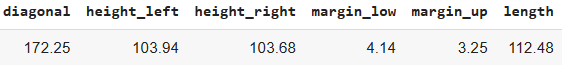
<!-- 1412 -->

In [63]:
import numpy as np
import math

In [65]:
df2 = pd.read_csv("deteksi_uang_palsu.csv")

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [66]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi :

# Membuat Tabel Jarak
# Membuat dataframe
data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menambahkan kolom distance pada tabel Jarak
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - data['diagonal'].values[0])**2
    + (df2['height_left'] - data['height_left'].values[0])**2
    + (df2['height_right'] - data['height_right'].values[0])**2
    + (df2['margin_low'] - data['margin_low'].values[0])**2
    + (df2['margin_up'] - data['margin_up'].values[0])**2
    + (df2['length'] - data['length'].values[0])**2
)

# Menampilkan tabel Jarak yang telah ditambahkan kolom distance
print('Tabel Jarak : ')
print(df2)

Tabel Jarak : 
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84   

In [67]:
# Mengatur tampilan data agar lebih rapi dan sesuai pada setiap kolom yang ada
pd.set_option('display.max_columns', None)

# Mengatur ukuran tampilan lebar tabel menjadi 250
pd.set_option('display.width', 250)

print(df2)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

In [68]:
# 2. Urutkan data berdasarkan K jarak terdekat

# Mengurutkan data dari terkecil hingga terbesar
sorted_data = df2.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df2)))

# Menentukan data terdekat
data_terdekat = sorted_data.head(k)

# Hasil perhitungan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [69]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Melakukan klasifikasi
pred_label = data_terdekat['is_genuine'].value_counts().idxmax()

# Hasil prediksi
print("Hasil prediksi: ",pred_label)

Hasil prediksi:  True


# (3) Analisis

> Nama : Selamat Riyandi

> Nim : 2109116064


## Business Understanding

Tema : Kesehatan

Judul Dataset : Heart Attack Analysis & Prediction Dataset

Sumber Dataset : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


Dataset ini merupakan data yang berisi beberapa variabel yang menjadi faktor sesorang terkena serangan jantung. Dataset tersebut berguna dalam bidang medis dan kesehatan guna menghindari atau meminimalisir faktor-faktor yang menjadi penyebab seseorang terkena serangan jantung. Dengan data ini juga bisa menjadi tolak ukur perhitungan dalam memprediksi seseorang apakah memiliki peluang terkena serangan jantung atau tidak, meskipun tingkat keakuratannya tidaklah sempurna sebab kondisi pada setiap orang sangatlah beragam dan berbeda satu sama lainnya.

## Data Understanding

In [76]:
df3 = pd.read_csv("heart.csv")

df3

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [72]:
df3.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Penjelasan Kolom**

1. Kolom 'Age' merupakan kolom yang menunjukan usia pasien.
2. Kolom 'Sex' merupakan kolom yang menunjukan jenis kelamin pasien.
3. Kolom 'cp' merupakan kolom yang menunjukan tipe nyeri pada bagian dada yang diderita oleh pasien.<br>
Value 1: typical angina <br>
Value 2: atypical angina <br>
Value 3: non-anginal pain<br>
Value 4: asymptomatic<br>
4. Kolom 'trtbps' merupakan yang menunjukan tekanan darah pasien dalam keadaan istirahat.
5. Kolom 'chol' merupakan kolom yang menunjukan kadar kolestoral pasien dalam mg/dl yang diambil melalui sensor BMI.
6. Kolom 'fbs' merupakan kolom yang menunjukan kadar gula darah pasien > 120 mg/dl (1 = true; 0 = false).
7. Kolom 'restecg' merupakan kolom yang menunjukan hasil elektrokardiografi istirahat pasien. <br>
Value 0: normal <br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
8. Kolom 'talachh' merupakan kolom yang menunjukan detak jantung maksimum yang dicapai oleh pasien.
9. Kolom 'exng' merupakan kolom yang menunjukan angina yang diinduksi oleh olahraga (1 = true; 0 = false).
10. Kolom 'oldpeak' merupakan kolom yang menunjukan nilai oldpeak pasien.
11. Kolom 'ca' merupakan kolom yang menunjukan number of major vessels (0-3).
12. Kolom 'target' merupakan kolom yang menunjukan peluang indikasi pasien terkena serangan jantung (0= less chance of heart attack 1= more chance of heart attack).


<Axes: xlabel='sex', ylabel='count'>

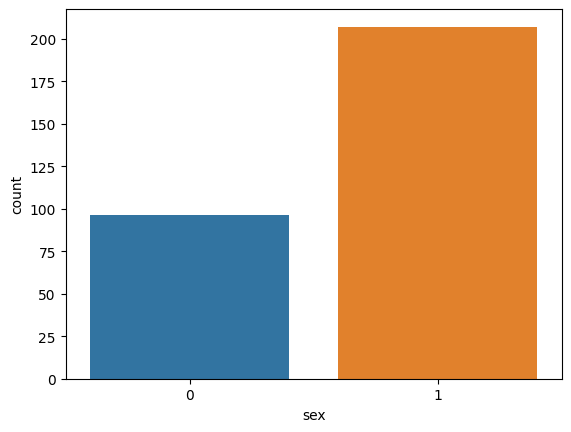

In [77]:
sns.countplot(data=df3, x="sex")

In [78]:
df3.isna()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
df3.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [80]:
vc = pd.get_dummies(df3)
vc

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
